First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


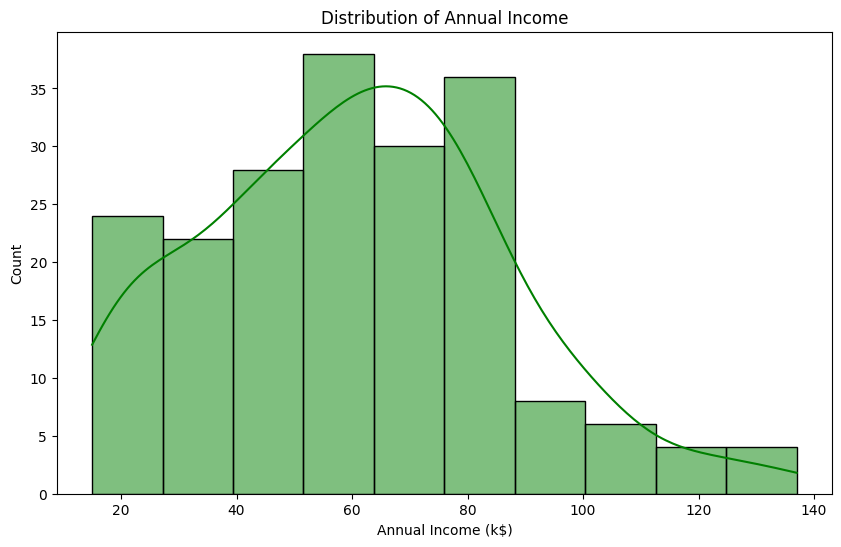

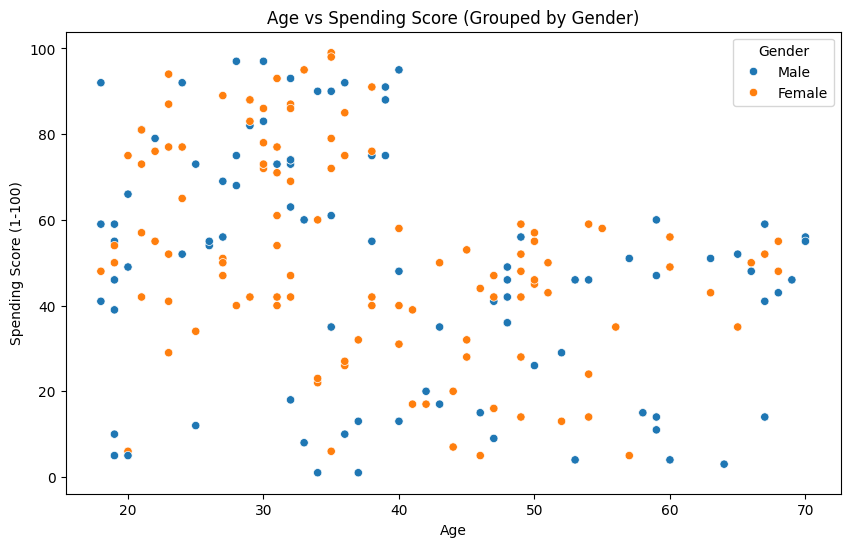

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load the Dataset ---
df = pd.read_csv("D:\Elevvo_ML\dataset_of task2\Mall_Customers.csv")

# --- Step 2: Basic Data Exploration ---
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

# --- Step 3: Visualization (EDA) ---
# Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, color='green')
plt.title('Distribution of Annual Income')
plt.show()

# Relationship between Age and Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Age vs Spending Score (Grouped by Gender)')
plt.show()

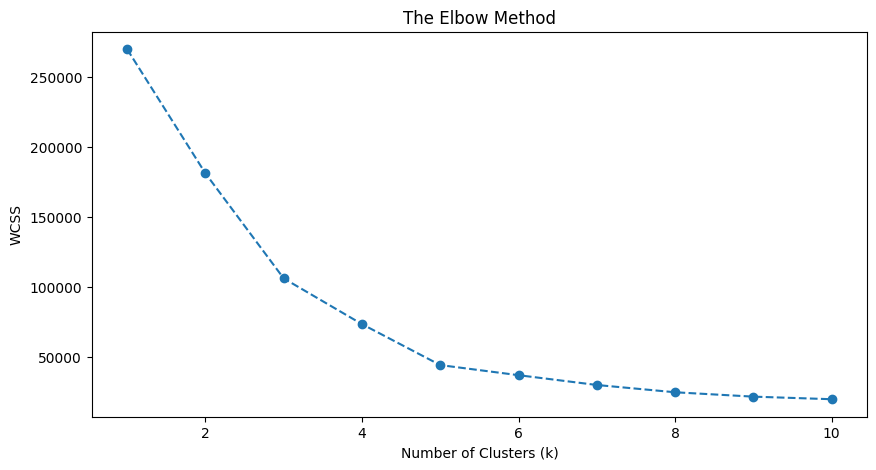

In [8]:
from sklearn.cluster import KMeans

# --- Step 1: Select Features for Clustering ---
# We use only 'Annual Income' and 'Spending Score'
X = df.iloc[:, [3, 4]].values 

# --- Step 2: Finding the optimal number of clusters (The Elbow Method) ---
wcss = [] 
for i in range(1, 11):
    # Added n_init=10 explicitly to suppress the future warning
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# --- Step 3: Plotting the Elbow Graph ---
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

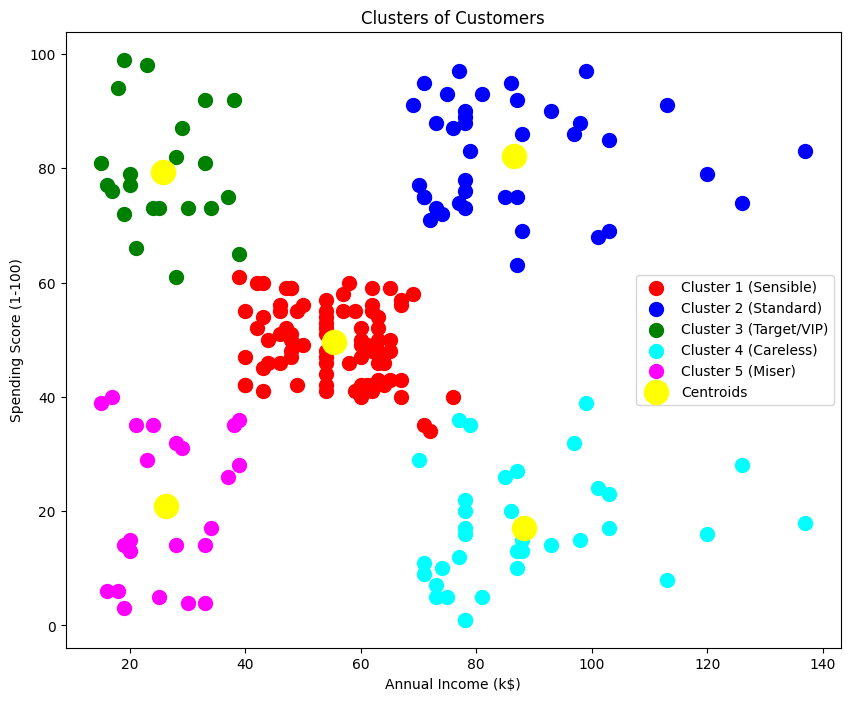

In [11]:
# --- Step 1: Train the Final K-Means Model ---
# We use n_clusters=5 because of the Elbow Method result
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# --- Step 2: Visualization ---
plt.figure(figsize=(10, 8))

# Scatter plot for each cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1 (Sensible)')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2 (Standard)')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3 (Target/VIP)')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4 (Careless)')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5 (Miser)')

# Plotting the centroids (the center points of each cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.cluster import KMeans
import numpy as np
from IPython.display import HTML 

X = df.iloc[:, [3, 4]].values 

fig, ax = plt.subplots(figsize=(10, 8))

def update(iter):
    ax.clear()
    kmeans = KMeans(n_clusters=5, init='random', n_init=1, max_iter=iter+1, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    colors = ['red', 'blue', 'green', 'cyan', 'magenta']
    for i in range(5):
        ax.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')
    
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], s=200, c='yellow', marker='X', edgecolors='black', label='Centroids')
    
    ax.set_title(f'K-Means Iteration: {iter + 1}')
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Spending Score (1-100)')
    ax.legend()

#Animation
ani = FuncAnimation(fig, update, frames=10, interval=1000, repeat=False)
plt.close() 
HTML(ani.to_jshtml())